In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = clf.fit(X_train, y_train)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini =

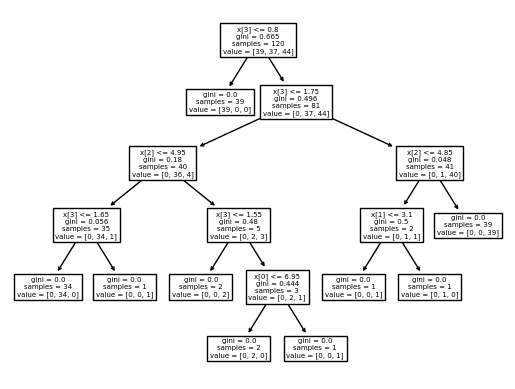

In [2]:
tree.plot_tree(clf)

Meilleurs paramètres trouvés :
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Scores de validation croisée : [0.5        1.         0.83333333 0.83333333 0.83333333]
Moyenne des scores : 0.8


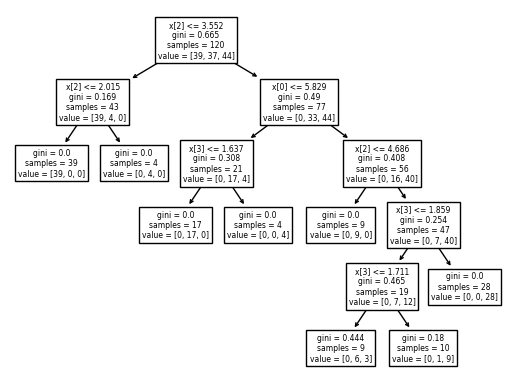

In [3]:
from sklearn.model_selection import GridSearchCV, cross_val_score


# Définir la grille des paramètres à explorer
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer l'objet GridSearchCV avec validation croisée
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Adapter le modèle aux données
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

# Utiliser le modèle avec les meilleurs paramètres
best_clf = grid_search.best_estimator_

# Afficher l'arbre de décision
tree.plot_tree(best_clf)

# Effectuer une validation croisée avec le meilleur modèle
cv_scores = cross_val_score(best_clf, X_test, y_test, cv=5)
print("Scores de validation croisée :", cv_scores)
print("Moyenne des scores :", np.mean(cv_scores))